<a href="https://colab.research.google.com/github/irvispano1/fin/blob/master/q1_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# Enter your candidate ID here:
# Enter your student ID here:
# Do NOT enter your name

# 4QQMN506 Coursework Q1

In [ ]:
"""
The data provided is from https://data.worldbank.org/
world_bank.csv is Indicator ID FP.CPI.TOTL.ZG for Inflation, consumer prices (annual %)
The world_bank_countries.csv is a list of the world bank countries and continents.

"""

In [1]:
# called wb_data and wb_country_data
import pandas as pd
import numpy as np
wb_data = pd.read_csv('./world_bank.csv')
wb_country_data = pd.read_csv('./world_bank_countries.csv')
# print(wb_data.head())
# print(wb_country_data.head(10))

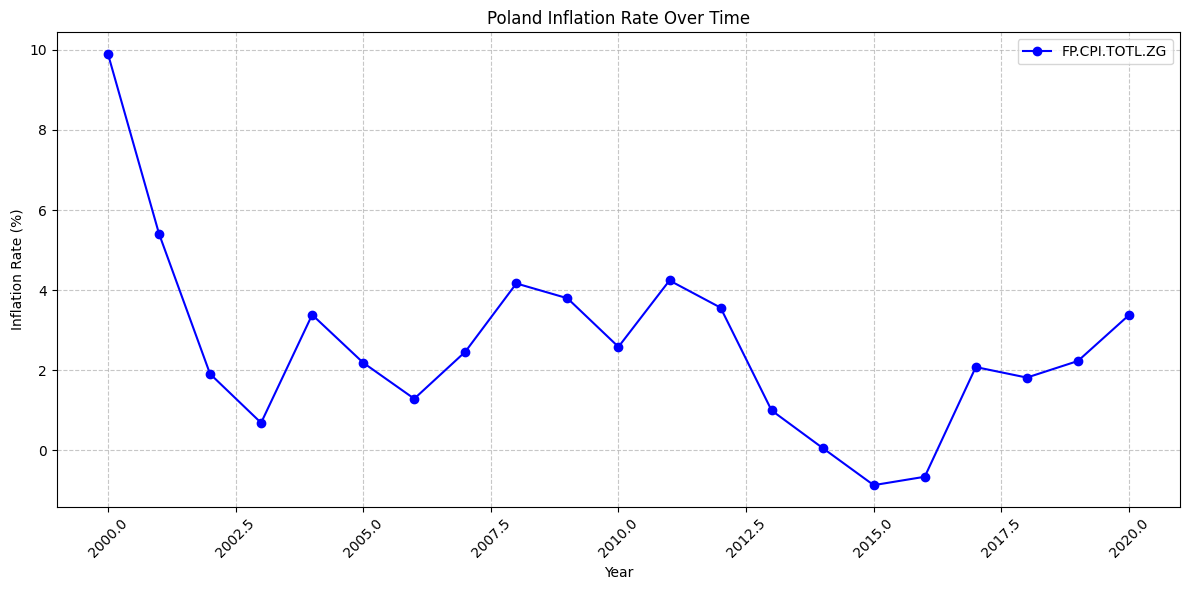

In [2]:
import matplotlib.pyplot as plt

# Filter data for Poland
poland_data = wb_data[wb_data['country'] == 'Poland']

# If no data is found with 'country', try with 'Country Name' instead
if poland_data.empty:
    poland_data = wb_data[wb_data['Country Name'] == 'Poland']

if not poland_data.empty:
    # Set up the plot
    plt.figure(figsize=(12, 6))

    # Plot directly from the DataFrame
    poland_data.plot(x='year', y='FP.CPI.TOTL.ZG', kind='line', marker='o',
                    color='blue', ax=plt.gca())

    # Enhance the plot
    plt.title('Poland Inflation Rate Over Time')
    plt.xlabel('Year')
    plt.ylabel('Inflation Rate (%)')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("No data found for Poland. Please check country names in the dataset.")

In [ ]:
# Save transposed data for later use
if not poland_data.empty:
    poland_data_t = poland_data.set_index('year')['FP.CPI.TOTL.ZG'].T
    print(poland_data)
    print("Transposed data for Poland:")
    print(poland_data_t.head())  # Display the transposed data for Poland

In [ ]:
# Lower middle income, Middle Income and Upper Middle Income for all dates
# from the wb_data DataFrame.
import matplotlib.pyplot as plt

# Define income groups
income_groups = ['High income', 'Low & middle income', 'Low income',
                'Lower middle income', 'Middle income', 'Upper middle income']

# Filter data for income groups
income_data = wb_data[wb_data['country'].isin(income_groups)]

# Create a pivot table for easier plotting
income_pivot = income_data.pivot(index='year', columns='country', values='FP.CPI.TOTL.ZG')

# Sort by year (ascending)
income_pivot = income_pivot.sort_index()

# Plot the data
plt.figure(figsize=(14, 8))
for group in income_groups:
    if group in income_pivot.columns:
        plt.plot(income_pivot.index, income_pivot[group], marker='o', linestyle='-', label=group)

# Enhance the plot
plt.title('Inflation Rates by Income Group (2000-2020)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Inflation Rate (%)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Income Groups', fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Save the income group data for later use (part h)
income_data_t = income_pivot.T

In [ ]:
# plot the top 10 in a bar chart using matplotlib.
# Exclude aggregates like income groups and regions
# First, identify all aggregates to exclude (income groups plus regions/groups)
# Income groups already defined earlier
import matplotlib.pyplot as plt

# Use world_bank_countries.csv to identify aggregates vs countries
wb_country_info = pd.read_csv('./Q1 data/world_bank_countries.csv')

# Identify aggregates - these have 'Aggregates' in the 'region' column
aggregates = wb_country_info[wb_country_info['region'] == 'Aggregates']['name'].tolist()

# Also add income classifications which may not be marked as aggregates
income_groups = ['High income', 'Low & middle income', 'Low income',
                'Lower middle income', 'Middle income', 'Upper middle income']
aggregates.extend(income_groups)

# Add other known regional aggregates that might not be captured
regional_aggregates = [
    'World', 'Arab World', 'Caribbean small states', 'Central Europe and the Baltics',
    'Early-demographic dividend', 'East Asia & Pacific', 'Europe & Central Asia',
    'Euro area', 'European Union', 'Fragile and conflict affected situations',
    'Heavily indebted poor countries (HIPC)', 'IBRD only', 'IDA & IBRD total',
    'IDA blend', 'IDA only', 'IDA total', 'Late-demographic dividend',
    'Latin America & Caribbean', 'Least developed countries: UN classification',
    'Middle East & North Africa', 'North America', 'OECD members', 'Other small states',
    'Pacific island small states', 'Post-demographic dividend', 'Pre-demographic dividend',
    'Small states', 'South Asia', 'Sub-Saharan Africa'
]
aggregates.extend(regional_aggregates)

# Common patterns in aggregate names
aggregate_patterns = ['excluding high income', 'IDA & IBRD countries']

# Filter data for individual countries only
country_data = wb_data[~wb_data['country'].isin(aggregates)]

# Further filter out entries containing aggregate patterns
for pattern in aggregate_patterns:
    country_data = country_data[~country_data['country'].str.contains(pattern, na=False)]

# Calculate mean inflation for each country
country_means = country_data.groupby('country')['FP.CPI.TOTL.ZG'].mean().reset_index()

# Sort countries by mean inflation (descending)
country_means = country_means.sort_values('FP.CPI.TOTL.ZG', ascending=False)

# Get top 10 countries
top_10 = country_means.head(10)

# Create bar chart
plt.figure(figsize=(14, 8))
bars = plt.bar(top_10['country'], top_10['FP.CPI.TOTL.ZG'], color='orange')

# Add value labels above each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{height:.1f}%', ha='center', va='bottom', fontweight='bold')

# Add labels and title
plt.title('Top 10 Countries by Mean Inflation Rate (2000-2020)', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Mean Inflation Rate (%)', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("Top 10 countries with highest mean inflation:")
for i, (country, rate) in enumerate(zip(top_10['country'], top_10['FP.CPI.TOTL.ZG']), 1):
    print(f"{i}. {country}: {rate:.2f}%")

In [ ]:
# Filter for 2020 data

import matplotlib.pyplot as plt

# Filter for 2020 data only
data_2020 = wb_data[wb_data['year'] == 2020]

# Exclude aggregates using the same approach as in part d)
# First, get all aggregates
aggregates = wb_country_info[wb_country_info['region'] == 'Aggregates']['name'].tolist()

# Add income groups and regional aggregates
income_groups = ['High income', 'Low & middle income', 'Low income',
                'Lower middle income', 'Middle income', 'Upper middle income']
aggregates.extend(income_groups)

regional_aggregates = [
    'World', 'Arab World', 'Caribbean small states', 'Central Europe and the Baltics',
    'Early-demographic dividend', 'East Asia & Pacific', 'Europe & Central Asia',
    'Euro area', 'European Union', 'Fragile and conflict affected situations',
    'Heavily indebted poor countries (HIPC)', 'IBRD only', 'IDA & IBRD total',
    'IDA blend', 'IDA only', 'IDA total', 'Late-demographic dividend',
    'Latin America & Caribbean', 'Least developed countries: UN classification',
    'Middle East & North Africa', 'North America', 'OECD members', 'Other small states',
    'Pacific island small states', 'Post-demographic dividend', 'Pre-demographic dividend',
    'Small states', 'South Asia', 'Sub-Saharan Africa'
]
aggregates.extend(regional_aggregates)

# Filter out aggregates
countries_2020 = data_2020[~data_2020['country'].isin(aggregates)]

# Filter out entries with aggregate patterns
aggregate_patterns = ['excluding high income', 'IDA & IBRD countries']
for pattern in aggregate_patterns:
    countries_2020 = countries_2020[~countries_2020['country'].str.contains(pattern, na=False)]

# Sort by inflation rate (ascending) and select the 5 lowest
lowest_inflation_2020 = countries_2020.sort_values('FP.CPI.TOTL.ZG').head(5)

# Display the results
print("Five countries with the lowest inflation in 2020:")
for i, (country, inflation) in enumerate(zip(lowest_inflation_2020['country'],
                                           lowest_inflation_2020['FP.CPI.TOTL.ZG']), 1):
    print(f"{i}. {country}: {inflation:.2f}%")

# Create a bar chart to visualize the results
plt.figure(figsize=(12, 6))
bars = plt.bar(lowest_inflation_2020['country'], lowest_inflation_2020['FP.CPI.TOTL.ZG'],
             color='lightblue')

# Add value labels above each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{height:.2f}%', ha='center', va='bottom')

plt.title('Five Countries with Lowest Inflation Rates in 2020', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Inflation Rate (%)', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.3)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
countries_with_capital = wb_country_data[wb_country_data['Capital'] != ''].shape[0]
print(f"Number of countries with a stated capital city: {countries_with_capital}")

In [ ]:
# surface of a sphere (like the Earth) given their latitude and longitude coordinates.
# The longitude range is from -180 to 180 degrees and the latitude range is from -90 to 90 degrees.
# The latitude and longitude values for each country with a capital are stated in world_bank_countries.csv.
# Our reference point is 0 longitude and 0 latitude. What capital is the furthest away from the reference point?

from math import radians, cos, sin, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance in kilometers between two points
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles. Determines return value units.
    return c * r

# Filter countries with capital cities and valid coordinates
capitals = wb_country_data[wb_country_data['capitalCity'] != ''].dropna(subset=['longitude', 'latitude'])

# Calculate distance from (0,0) for each capital
capitals['distance'] = capitals.apply(
    lambda row: haversine(0, 0, row['longitude'], row['latitude']), axis=1
)

# Find the furthest capital
furthest_capital = capitals.loc[capitals['distance'].idxmax()]
print(f"The furthest capital from (0,0) is {furthest_capital['capitalCity']} ({furthest_capital['name']}) with a distance of {furthest_capital['distance']:.2f} km")

In [ ]:
#and the remotest country obtained in part g)

# Find the income group with the highest mean inflation rate from part c
income_group_means = income_data_t.mean(axis=1)
highest_income_group = income_group_means.idxmax()
highest_income_group_mean = income_group_means.max()

print(f"Income group with highest mean inflation: {highest_income_group} with {highest_income_group_mean:.2f}%")

# Get the remotest country from part g (which should be the furthest_capital identified earlier)
remotest_country = furthest_capital['name']
print(f"Remotest country: {remotest_country}")

# Get inflation data for the remotest country
remotest_country_data = wb_data[wb_data['country'] == remotest_country]

# Calculate mean inflation for the remotest country
remotest_country_mean = remotest_country_data['FP.CPI.TOTL.ZG'].mean()
print(f"Mean inflation for {remotest_country}: {remotest_country_mean:.2f}%")

# Calculate the difference
difference = highest_income_group_mean - remotest_country_mean
print(f"Difference in annual mean inflation: {abs(difference):.2f}%")

# Create a bar chart to visualize the comparison
plt.figure(figsize=(10, 6))
entities = [highest_income_group, remotest_country]
means = [highest_income_group_mean, remotest_country_mean]

bars = plt.bar(entities, means, color=['orange', 'blue'])

# Add value labels above each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{height:.2f}%', ha='center', va='bottom')

plt.title('Comparison of Mean Inflation Rates', fontsize=16)
plt.ylabel('Mean Inflation Rate (%)', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()